In [ ]:
import numpy as np
import os
import tensorflow as tf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/chest-xrays-radiopaedia/radiopaedia_metadata.csv
/kaggle/input/chest-xrays-radiopaedia/images/images/2412b38afe2934ca255f6876cab3c5_jumbo.jpg
/kaggle/input/chest-xrays-radiopaedia/images/images/2ffa7c298bb30eb0096183ffb48751_jumbo.jpg
/kaggle/input/chest-xrays-radiopaedia/images/images/0f2e6e546982a9ab13743d6c6ef507_jumbo.jpg
/kaggle/input/chest-xrays-radiopaedia/images/images/feba429fefadde9b448b452b97f020_jumbo.jpeg
/kaggle/input/chest-xrays-radiopaedia/images/images/466468ed976033ebe21111e001616d_jumbo.jpg
/kaggle/input/chest-xrays-radiopaedia/images/images/7ba82a7f11658b7d66a1de1aa1c06e_jumbo.jpeg
/kaggle/input/chest-xrays-radiopaedia/images/images/f31e0382e9ee43950f4e7714dcf51f_jumbo.jpg
/kaggle/input/chest-xrays-radiopaedia/images/images/d7394624493f253a61ed5d2d026a34_jumbo.jpeg
/kaggle/input/chest-xrays-radiopaedia/images/images/e2f144b5e77858dc5102c17b626b8b_jumbo.jpeg
/kaggle/input/chest-xrays-radiopaedia/images/images/957b99c83364d332b6a033dd8360a3_jumbo.jpeg
/k

In [4]:
bad_frames = '/kaggle/input/chest-xrays-radiopaedia/images/images/'

In [5]:
bad_frames

'/kaggle/input/chest-xrays-radiopaedia/images/images/'

In [6]:
# !pip install pydot
# !pip install graphviz

In [7]:
noisy_frames = []
for file in tqdm(sorted(os.listdir(bad_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames + '/' + file, target_size=(256,256))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    noisy_frames.append(image)

noisy_frames = np.array(noisy_frames)

  0%|          | 0/3662 [00:00<?, ?it/s]

In [8]:
print(noisy_frames.shape)

(3549, 256, 256, 3)


In [9]:
good_frames='/kaggle/input/chest-xrays-radiopaedia/images/images/'

In [10]:
clean_frames = []
for file in tqdm(sorted(os.listdir(good_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(good_frames + '/' + file, target_size=(256,256))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    clean_frames.append(image)

clean_frames = np.array(clean_frames)

  0%|          | 0/3662 [00:00<?, ?it/s]

In [11]:
print(clean_frames.shape)

(3549, 256, 256, 3)


In [12]:
round(len(noisy_frames)*0.8)

2839

In [13]:
#80% of images to training set
noisy_train = noisy_frames[0:round(len(noisy_frames)*0.8)]
noisy_test = noisy_frames[round(len(noisy_frames)*0.8):]

clean_train = clean_frames[0:round(len(clean_frames)*0.8)]
clean_test = clean_frames[round(len(clean_frames)*0.8):]

In [14]:
autoencoder = tf.keras.models.Sequential()
#Layer 1
autoencoder.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', input_shape = (256, 256, 3)))
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 3
autoencoder.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 4
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 5
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 6
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 7
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 8
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 9
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 11
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 3, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'))
     

2023-02-13 13:53:09.672998: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      18464     
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      4624      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 16)      6

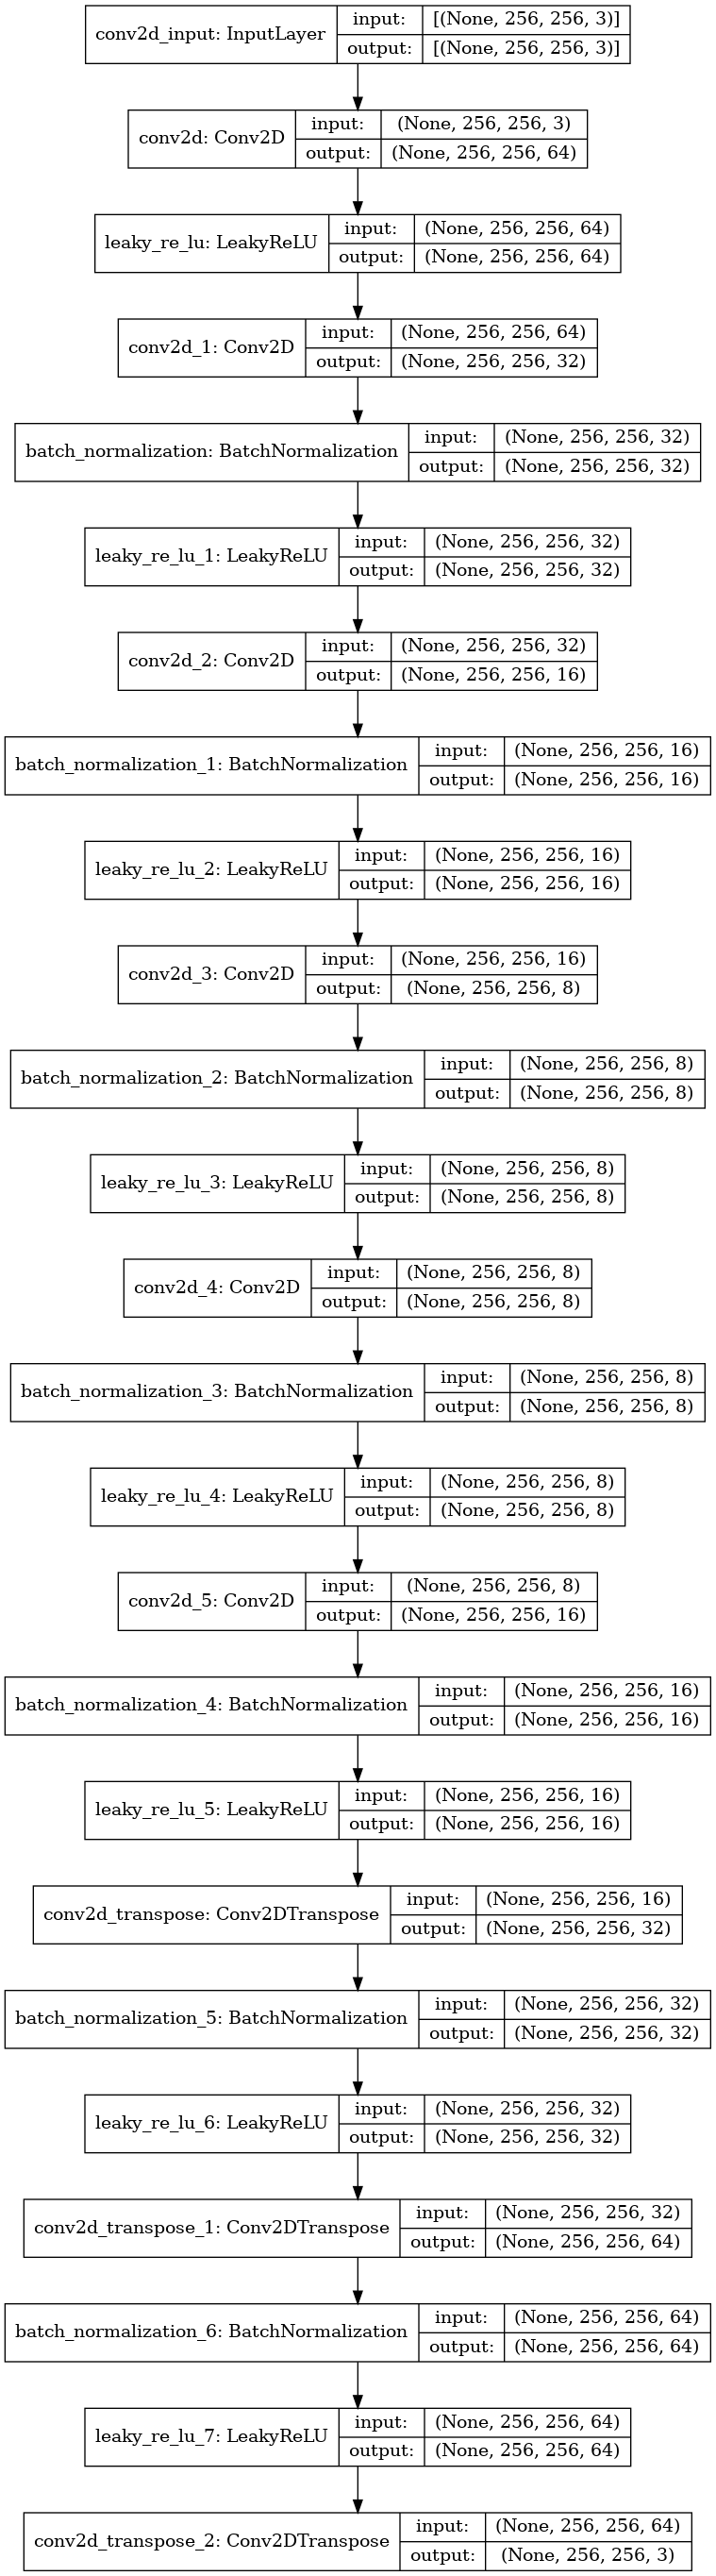

In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
plot_model(autoencoder, show_shapes=True)

In [17]:
#model_filepath="C:/Users/vasudha/Desktop/checkpoints.h5"
#checkpoint = ModelCheckpoint(filepath = model_filepath, monitor='val_accuracy', mode = 'max', save_best_only = True, verbose=1)
history = autoencoder.fit(noisy_train, clean_train, epochs=2, batch_size=10, validation_data=(noisy_test, clean_test))

2023-02-13 13:53:27.910934: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2
284/284 [==============================] - 913s 3s/step - loss: 0.5383 - val_loss: 0.5588
Epoch 2/2
284/284 [==============================] - 919s 3s/step - loss: 0.5313 - val_loss: 0.5360


In [18]:
#import pickle

In [20]:
#with open('history_pickle','wb') as f:
 #   pickle.dump(history,f)

TypeError: can't pickle weakref objects

In [ ]:
#with open('history_pickle','rb') as f:
 #   h = pickle.load(f)

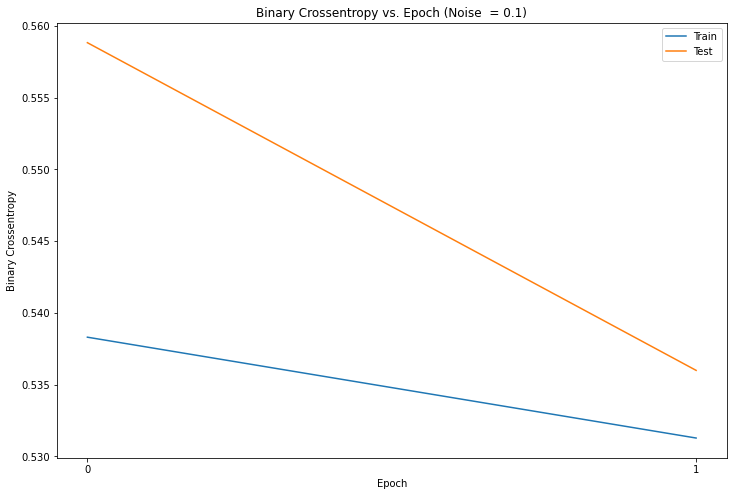

In [21]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Test'])
plt.title('Binary Crossentropy vs. Epoch (Noise  = 0.1)')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.xticks(ticks=history.epoch, labels=history.epoch)
plt.show()

In [22]:
results = autoencoder.predict(noisy_test)

In [23]:
image = np.random.randint(0, len(noisy_test))

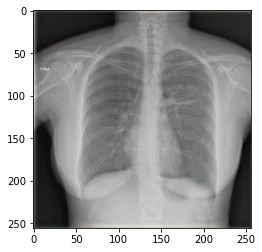

In [24]:
plt.imshow(results[image])
plt.show()

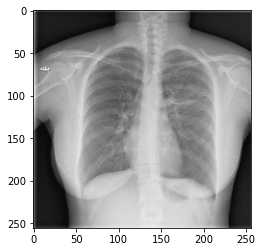

In [25]:
plt.imshow(noisy_test[image])
plt.show()

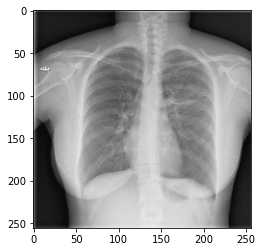

In [26]:
plt.imshow(clean_test[image])
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Good Frames: ",mean_squared_error(clean_train, autoencoder.predict(noisy_train)))